In [ ]:
# Avaliation of the parameters

In [2]:
%matplotlib inline
import numpy as np
import corner
import itertools
import matplotlib.pyplot as plt
from func import *
from scipy import optimize as op

In [3]:
#First data
#data = astro.io.ascii.read('Inputs/data/rvs_0001.txt', names=['time','vel','err'])
data = np.loadtxt('Inputs/data/rvs_0001.txt')
obser = [data[:,0],data[:,1],data[:,2]]

## zero planets - data 0001

The values of C and J, and evidence [-0.77305997  2.08848499] -487.09969


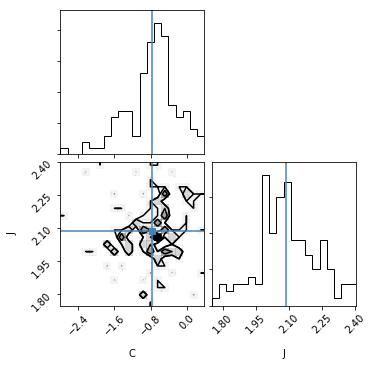

In [140]:
n_mixture = 2
samples = np.genfromtxt('chains/0pd0001a_equal_weights.txt')
z=!sed -n '38p' chains/0pd0001a.resume
z=np.float(z[0])
mus0p001 = np.mean(samples[:, 2:], axis=0)
sigs = np.std(samples[:, 2:], axis=0)
fig = corner.corner(samples[:, 2:], ranges=[[0, 1]*(3*n_mixture-1)],labels=['C','J'],truths=mus0p001)
print('The values of C and J, and evidence', mus0p001,z)

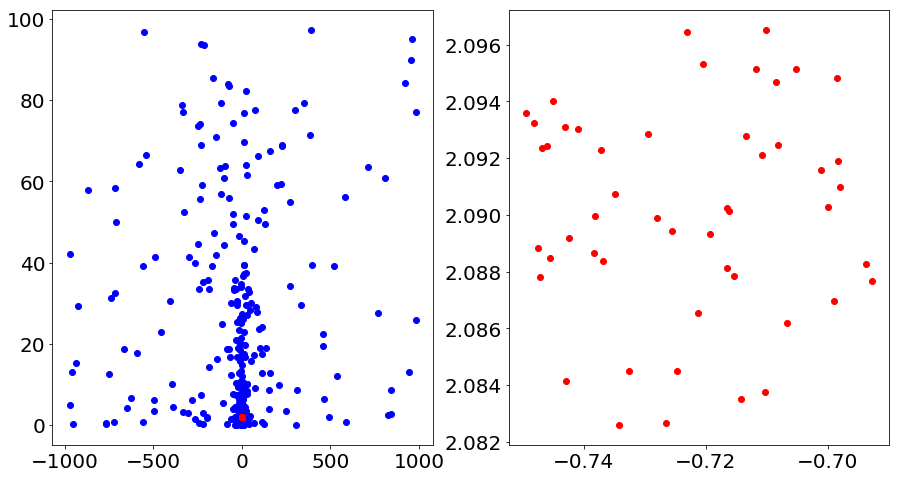

In [34]:
samples_runtime = np.genfromtxt('chains/0pd0001a_phys_live.txt')
samples_dead = np.genfromtxt('chains/0pd0001a_dead.txt')
plt.figure(1,figsize=(15,8))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(samples_dead[:,1],samples_dead[:,2], 'bo')
plt.plot(samples_runtime[:,0],samples_runtime[:,1], 'ro')
plt.subplot(122)
plt.tick_params(labelsize=20)
plt.plot(samples_runtime[:,0],samples_runtime[:,1], 'ro');

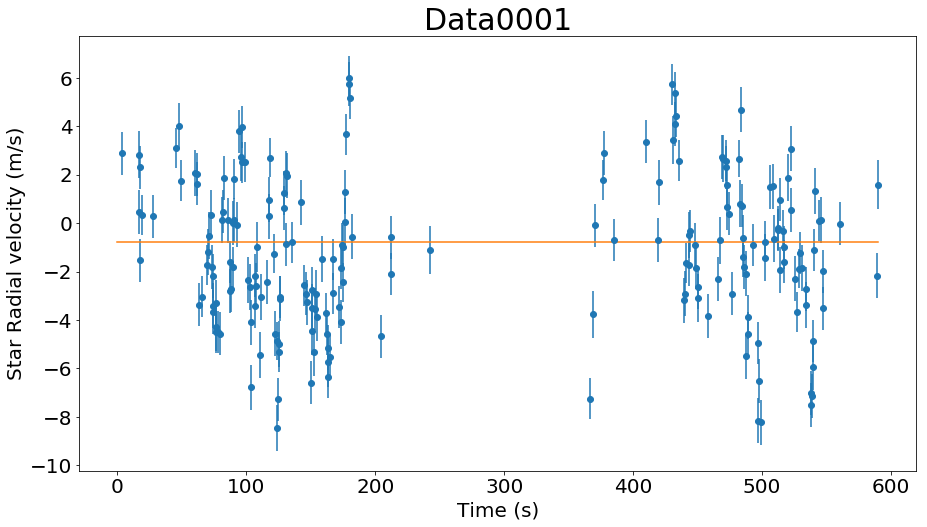

In [35]:
x = data[:,0]
xm = np.arange(0,data[-1,0],data[-1,0]/1000)
y = data[:,1]
y0 = model(mus0p001,xm,0)
yerr = data[:,2]
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(15,8))
#plt.xlabel('teste')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Star Radial velocity (m/s)', fontsize=20)
plt.errorbar(x, y, yerr=yerr,fmt='o')
plt.plot(xm,y0)
plt.tick_params(labelsize=20)
plt.title("Data0001",fontsize=30)
#plt.plot(x,y,'o')


plt.show()

In [7]:
z=!sed -n '38p' chains/0pd0001a.resume
z0pd0001a=np.float(z[0])*np.log10(np.e)
print('Nominal value:',z0pd0001a)
print('Relative value:', 1)


Nominal value: -211.544707504
Relative value: 1


## One planet - data 0001

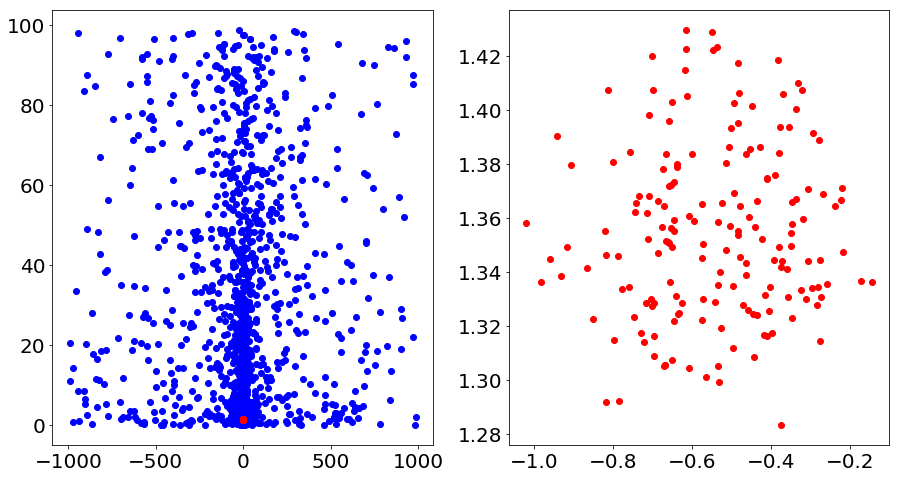

In [53]:
n_plan = 1
samples_runtime = np.genfromtxt('chains/1pd0001a_phys_live.txt')
samples_dead = np.genfromtxt('chains/1pd0001a_dead.txt')
plt.figure(1,figsize=(15,8))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(samples_dead[:,5*n_plan+1],samples_dead[:,5*n_plan+2], 'bo')
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro')
plt.subplot(122)
plt.tick_params(labelsize=20)
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro');

In [22]:
teste = (np.mean(np.sin(samples[:, 5:7]), axis=0),np.mean(np.cos(samples[:, 5:7]), axis=0))
print(teste)

(array([ 0.18316025, -0.27334614]), array([ 0.2488231 , -0.16404937]))


In [163]:
print(np.arctan2(0.18316025,0.2488231)%(2*np.pi))
print(np.arctan2(-0.27334614,-0.16404937)%(2*np.pi))

0.634549677541
4.17185735339


In [30]:
!cat chains/1pd0001a_equal_weights.txt

  0.10000000E+001  0.86254546E+003  0.41741497E+002  0.25401989E+001  0.42859626E+000  0.32343009E+001  0.11521488E+001 -0.71134910E+000  0.13756458E+001
  0.10000000E+001  0.85095202E+003  0.42301605E+002  0.23186119E+001  0.45000545E-001  0.61968809E+001  0.49582808E+001  0.72480328E+000  0.12815465E+001
  0.10000000E+001  0.84777407E+003  0.42274637E+002  0.21043992E+001  0.12859082E+000  0.57933762E+001  0.53564510E+001 -0.21985815E+000  0.13107406E+001
  0.10000000E+001  0.85108655E+003  0.42202990E+002  0.22899272E+001  0.15201351E+000  0.52667995E+001  0.59688541E+001 -0.18680357E+001  0.13716648E+001
  0.10000000E+001  0.85613001E+003  0.41990685E+002  0.24363150E+001  0.12549555E+000  0.59422065E+001  0.47252054E+001 -0.11023206E+001  0.12877369E+001
  0.10000000E+001  0.85158798E+003  0.42098730E+002  0.25095084E+001  0.30801145E+000  0.50887829E+001  0.58654310E+001 -0.14687669E+000  0.14475608E+001
  0.10000000E+001  0.85761226E+003  0.41730419E+002  0.22773368E+001  0.1622

[ 42.0815377    2.48336249   0.24126625   0.63454968   4.17185735
  -0.60731763   1.37822456]


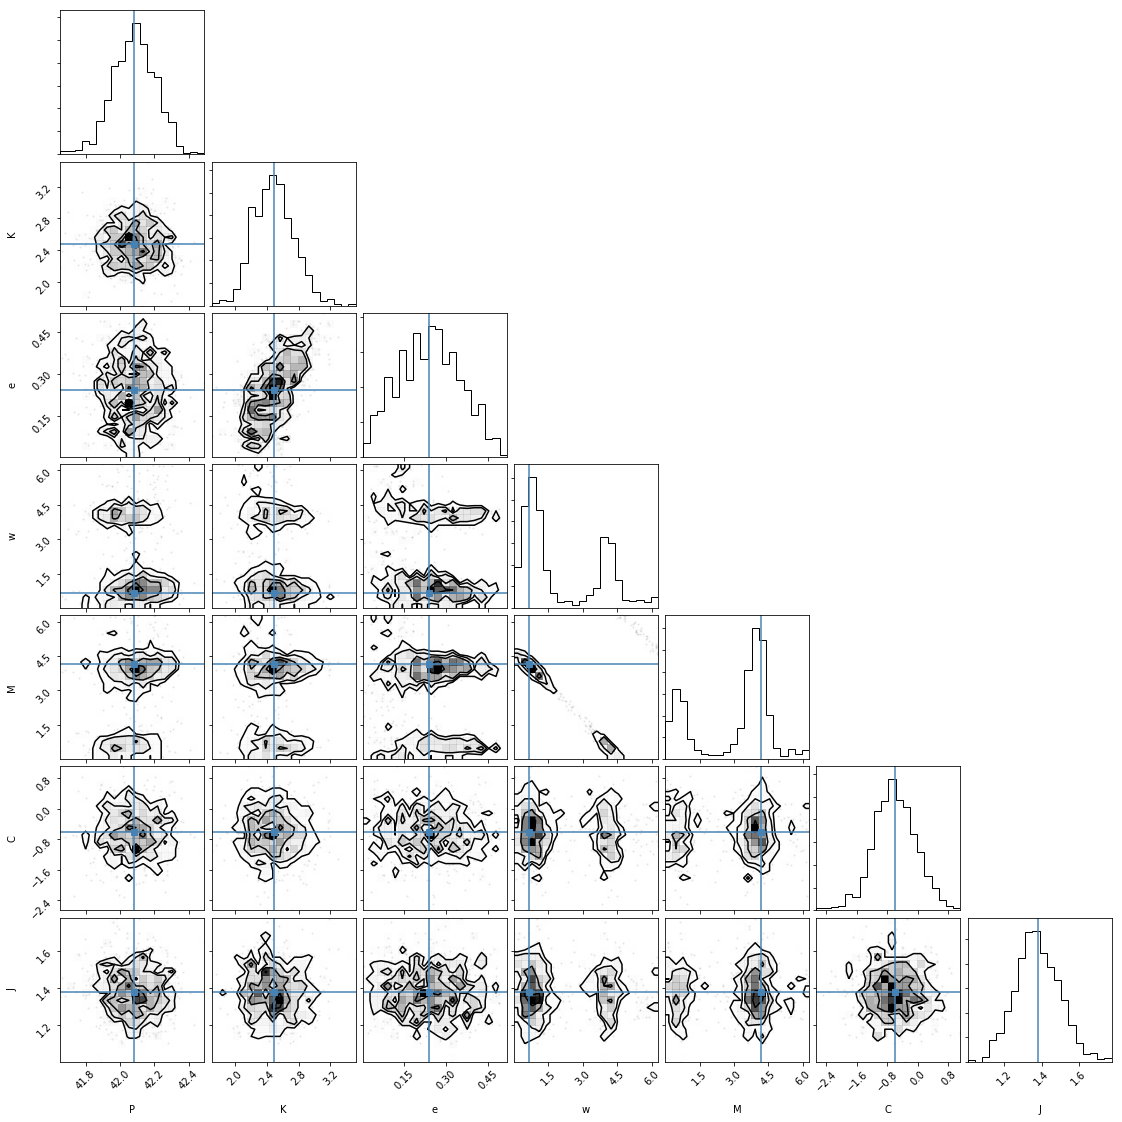

In [145]:
n_mixture = 7
samples = np.genfromtxt('chains/1pd0001a_equal_weights.txt')
#z=!sed -n '38p' chains/0pd0001.resume
#z=np.float(z[0])
mus1p001 = np.mean(samples[:, 2:], axis=0)
mus1p001[3] = 0.634549677541
mus1p001[4] = 4.17185735339
#sigs = np.std(samples[:, 2:], axis=0)
fig = corner.corner(samples[:, 2:], ranges=[[0, 1]*(3*n_mixture-1)],labels=['P','K','e','w','M','C','J'],truths=mus1p001)
print(mus1p001)
#print('The values of C and J, and evidence', mus0p001,z)

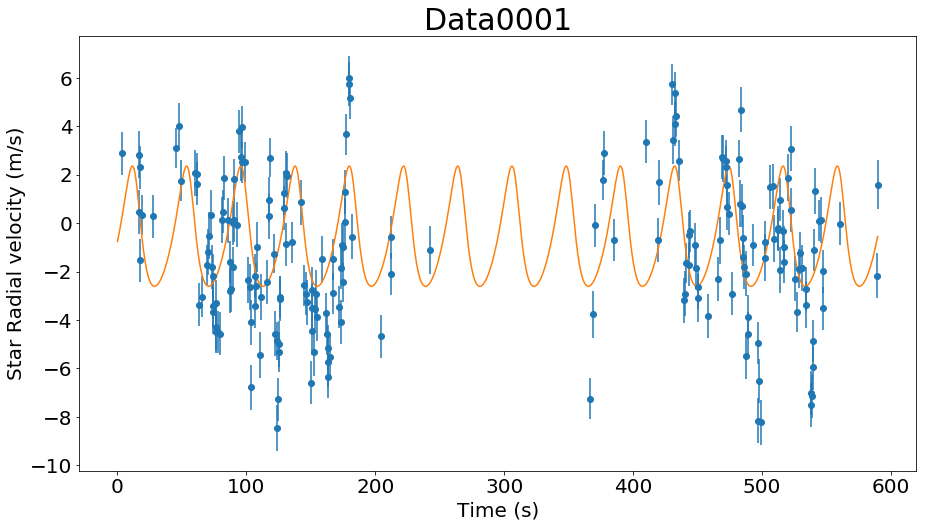

In [29]:
x = data[:,0]
xm = np.arange(0,data[-1,0],data[-1,0]/1000)
y = data[:,1]
y0 = model(mus1p001,xm,1)
yerr = data[:,2]
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(15,8))
#plt.xlabel('teste')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Star Radial velocity (m/s)', fontsize=20)
plt.errorbar(x, y, yerr=yerr,fmt='o')
plt.plot(xm,y0)
plt.tick_params(labelsize=20)
plt.title("Data0001",fontsize=30)
#plt.plot(x,y,'o')

In [132]:
z=!sed -n '38p' chains/1pd0001a.resume
z1pd0001a=np.float(z[0])*np.log10(np.e)
print('Nominal value:',z1pd0001a)
print('Relative value:', np.power(10,z1pd0001a-z0pd0001a))

Nominal value: -194.085600293
Relative value: 2.87810882107e+17


## two planets - data 0001

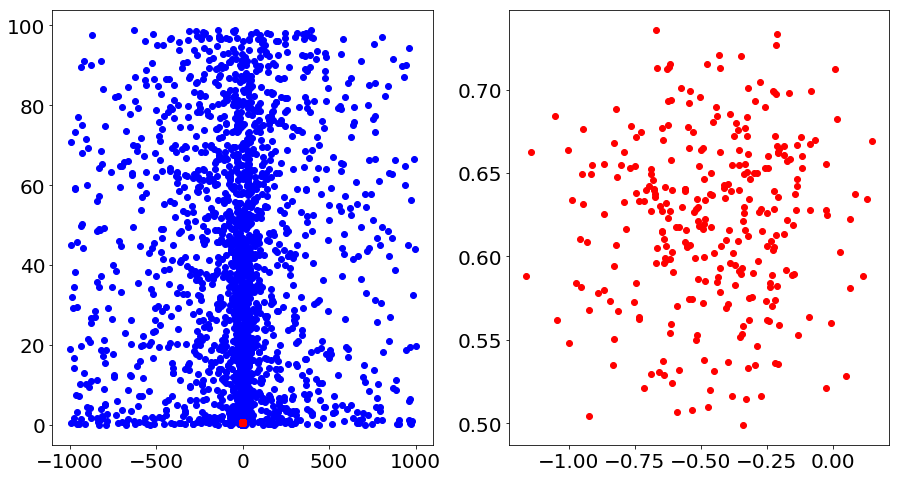

In [54]:
n_plan = 2
samples_runtime = np.genfromtxt('chains/2pd0001a_phys_live.txt')
samples_dead = np.genfromtxt('chains/2pd0001a_dead.txt')
plt.figure(1,figsize=(15,8))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(samples_dead[:,5*n_plan+1],samples_dead[:,5*n_plan+2], 'bo')
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro')
plt.subplot(122)
plt.tick_params(labelsize=20)
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro');

[  1.21088616e+01   1.75825681e+00   1.09271853e-01   9.06742319e-01
   2.04046948e-02   4.21960074e+01   2.26894474e+00   2.04789008e-01
   1.27898080e+00   3.64255512e+00  -4.62429696e-01   6.71065008e-01]


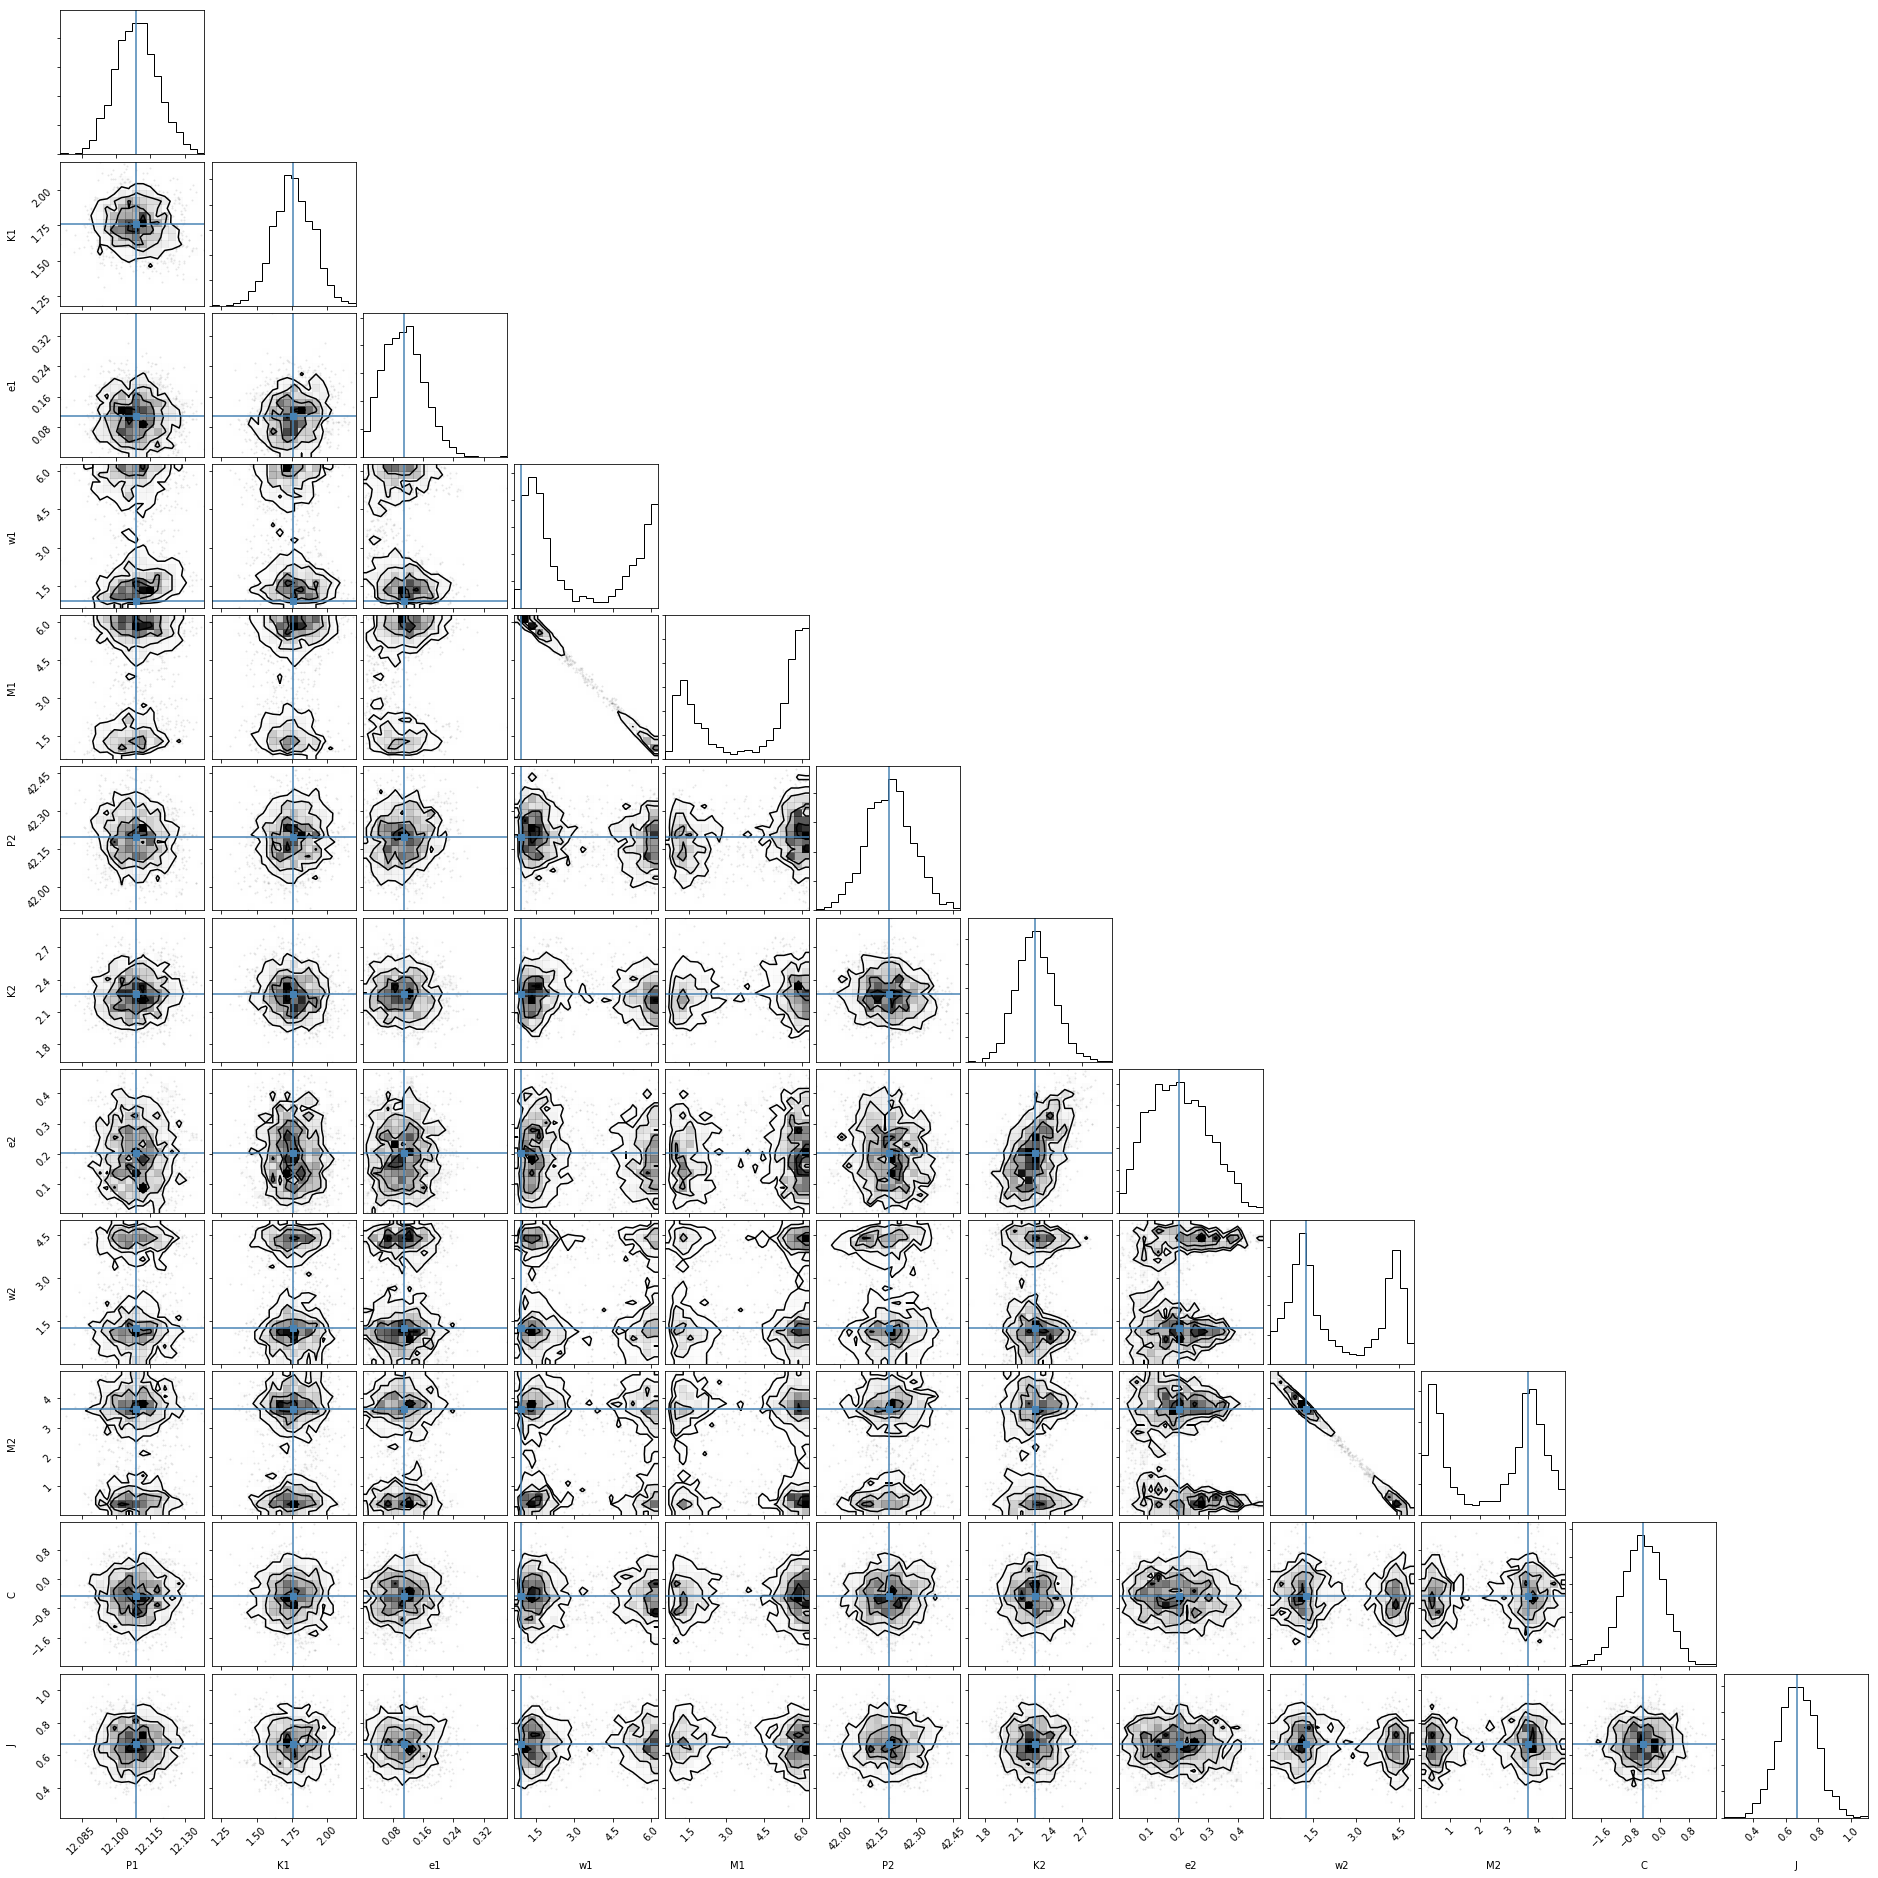

In [180]:
n_plan = 2
n_mixture = 2+n_plan*5
label=[]
samples2 = np.genfromtxt('chains/2pd0001a_equal_weights.txt')
#z=!sed -n '38p' chains/0pd0001.resume
#z=np.float(z[0])
mus2p001 = np.mean(samples2[:, 2:], axis=0)
for ene in range(n_plan):
    fac = 5*ene
    sen=np.mean(np.sin(samples2[:,5+fac:7+fac]),axis=0)
    cos=np.mean(np.cos(samples2[:,5+fac:7+fac]),axis=0)
    ang=np.arctan2(sen,cos)
    mus2p001[3+fac]=ang[0]%(2*np.pi)
    mus2p001[4+fac]=ang[1]%(2*np.pi)
    label=np.append(label,['P'+str(ene+1),'K'+str(ene+1),'e'+str(ene+1),'w'+str(ene+1),'M'+str(ene+1)])
label=np.append(label,['C','J'])
fig = corner.corner(samples2[:, 2:], ranges=[[0, 1]*(3*n_mixture-1)],labels=['P1','K1','e1','w1','M1',\
                            'P2','K2','e2','w2','M2','C','J'],truths=mus2p001)
print(mus2p001)
#print('The values of C and J, and evidence', mus0p001,z)

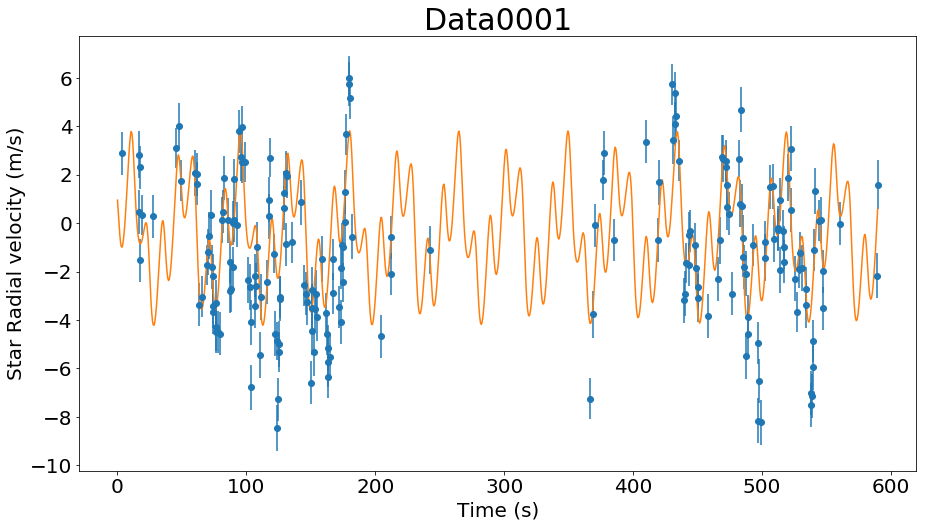

In [109]:
x = data[:,0]
xm = np.arange(0,data[-1,0],data[-1,0]/1000)
y = data[:,1]
y0 = model(mus2p001,xm,2)
yerr = data[:,2]
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(15,8))
#plt.xlabel('teste')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Star Radial velocity (m/s)', fontsize=20)
plt.errorbar(x, y, yerr=yerr,fmt='o')
plt.plot(xm,y0)
plt.tick_params(labelsize=20)
plt.title("Data0001",fontsize=30)
#plt.plot(x,y,'o')

In [165]:
z=!sed -n '38p' chains/2pd0001a.resume
z2pd0001a=np.float(z[0])*np.log10(np.e)+np.log10(2)
print('Nominal value:',z2pd0001a)
print('Relative value:', np.power(10,z2pd0001a-z0pd0001a))

Nominal value: -176.033395705
Relative value: 3.24572558397e+35


## Three planets - Data 0001

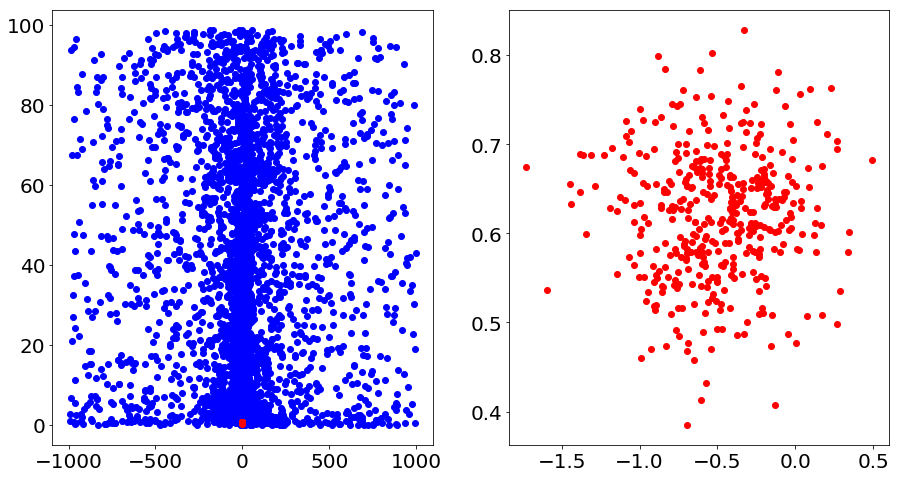

In [186]:
n_plan = 3
samples_runtime = np.genfromtxt('chains/3pd0001a_phys_live.txt')
samples_dead = np.genfromtxt('chains/3pd0001a_dead.txt')
plt.figure(1,figsize=(15,8))
plt.subplot(121)
plt.tick_params(labelsize=20)
plt.plot(samples_dead[:,5*n_plan+1],samples_dead[:,5*n_plan+2], 'bo')
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro')
plt.subplot(122)
plt.tick_params(labelsize=20)
plt.plot(samples_runtime[:,5*n_plan],samples_runtime[:,5*n_plan+1], 'ro');

[  1.21103576e+01   1.77942573e+00   1.11374447e-01   5.09331992e-01
   4.29728698e-01   4.21920560e+01   2.18157864e+00   1.37615763e-01
   5.51492953e+00   5.65231381e+00   2.58517844e+03   1.63215853e+00
   2.45716652e-01   5.51766827e+00   5.64668054e+00  -3.18808568e-01
   6.61112545e-01]


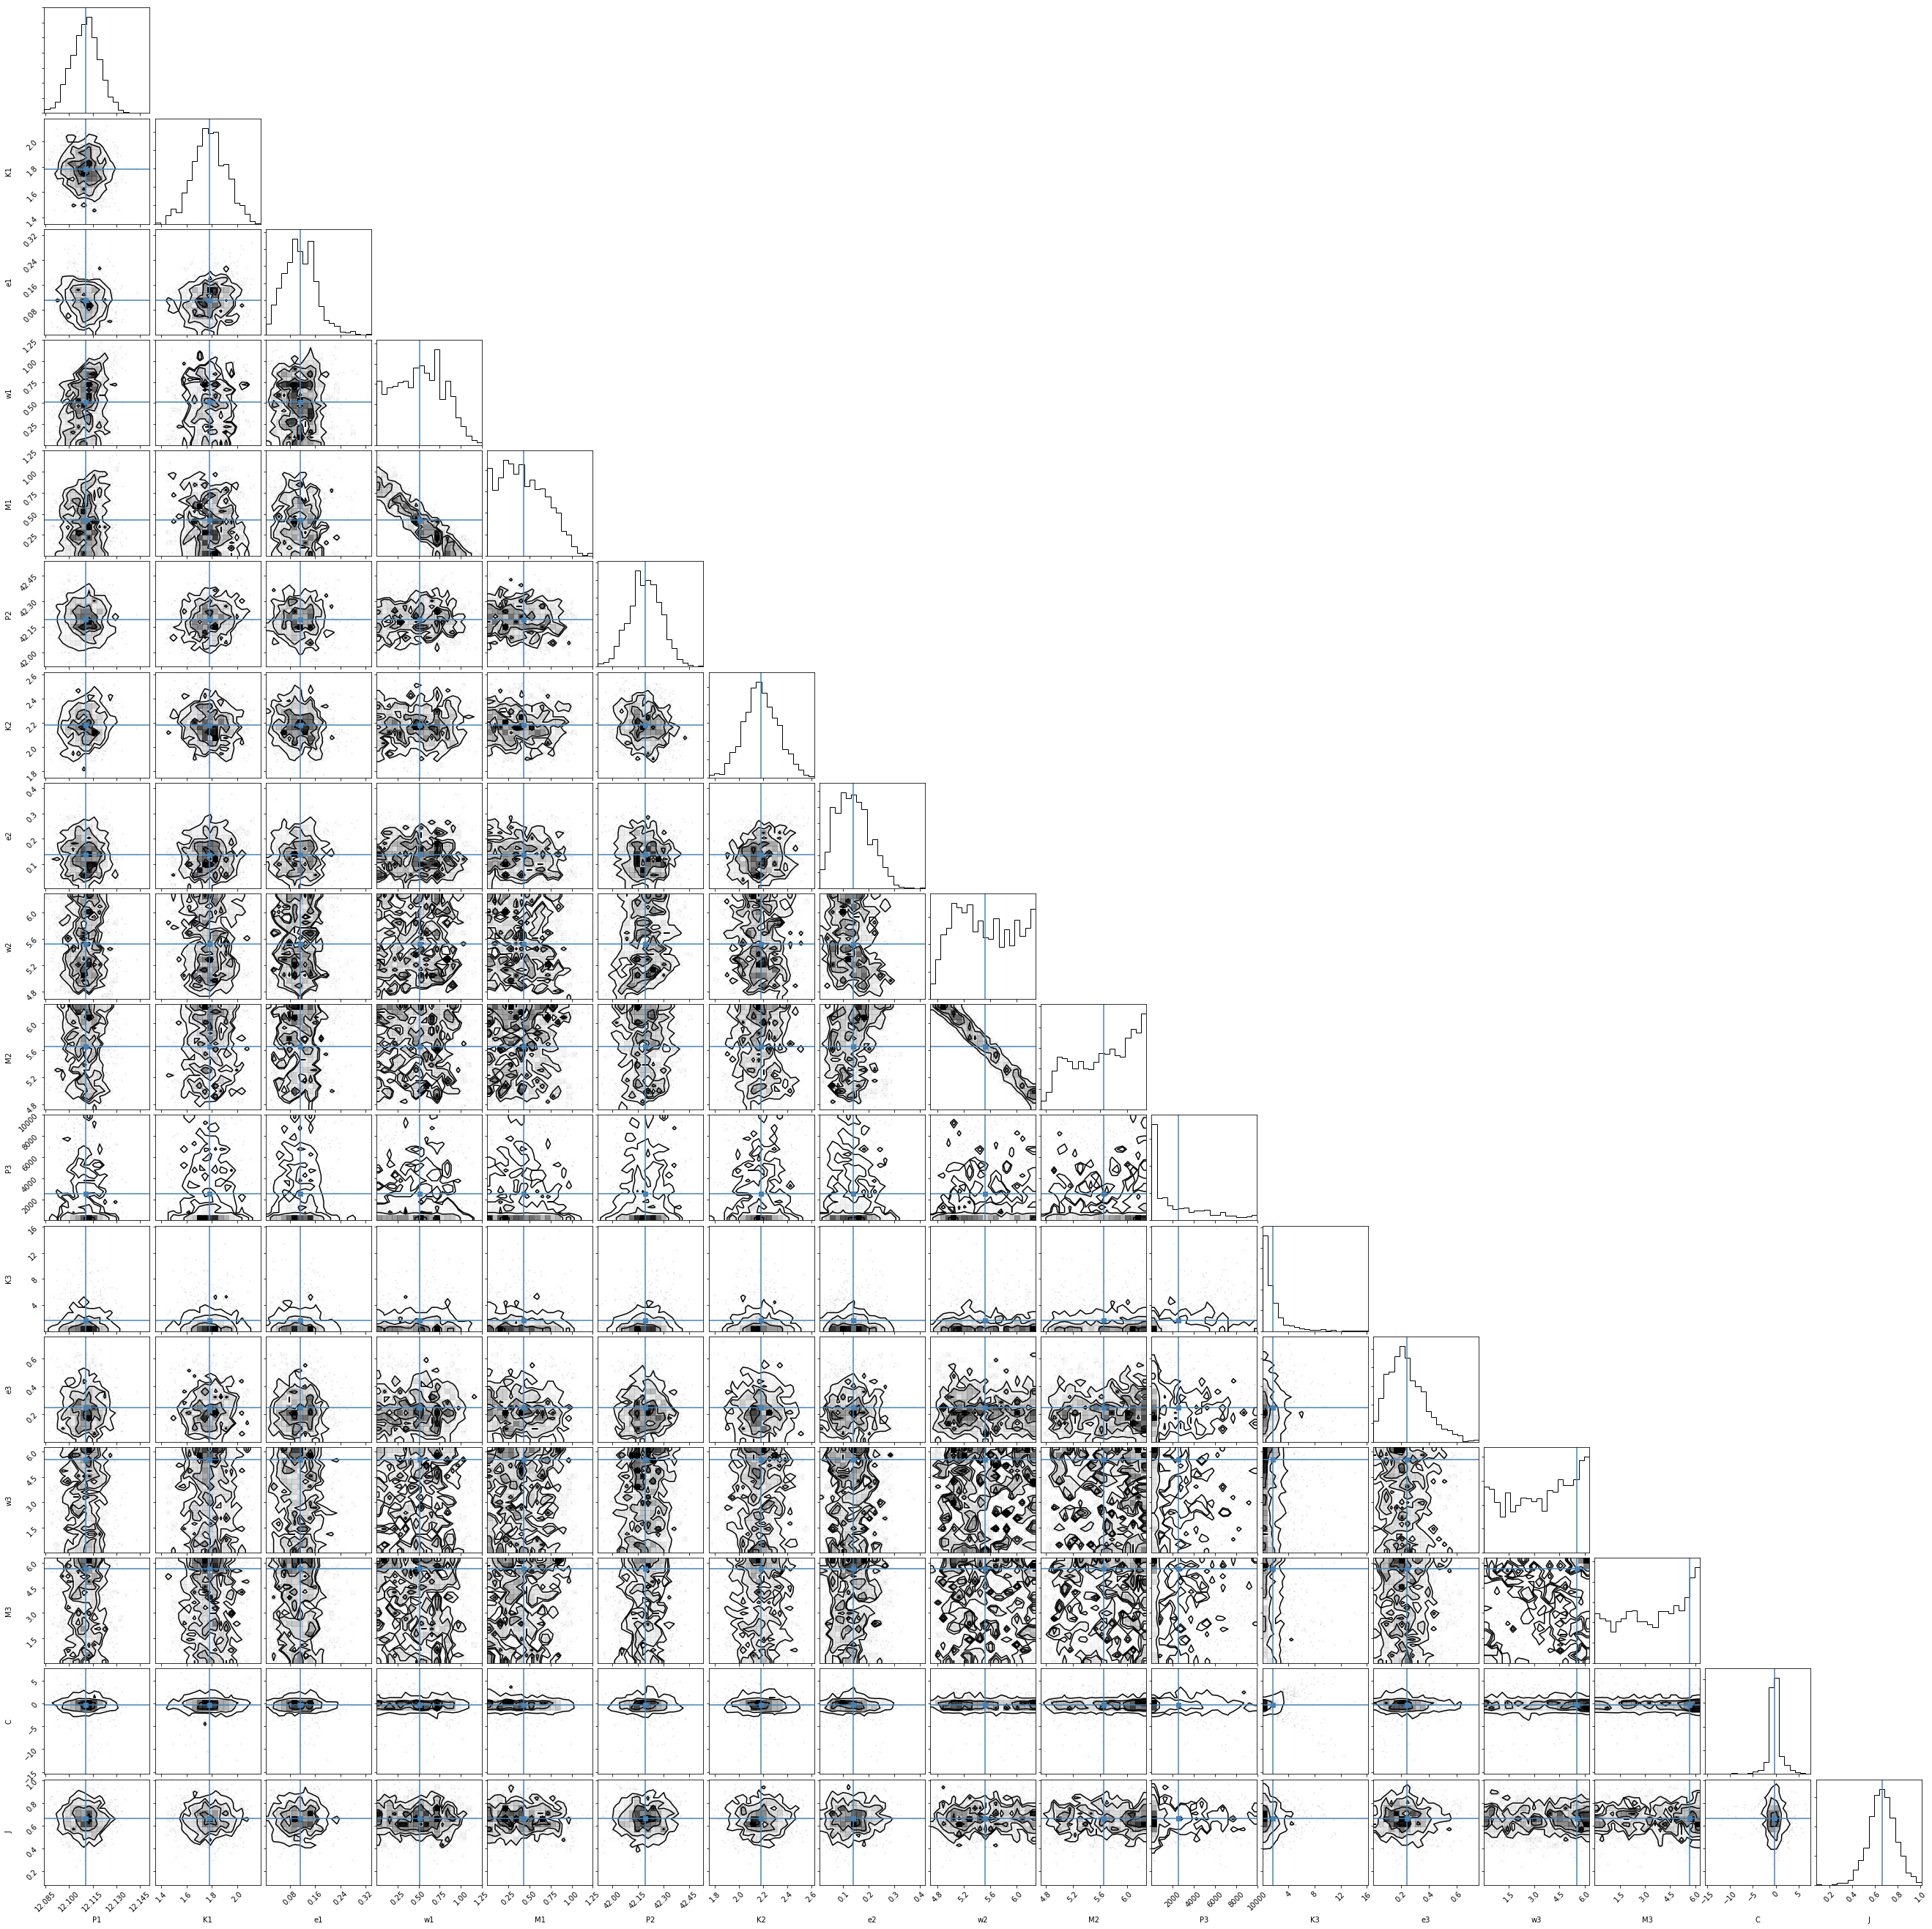

In [4]:
n_plan = 3
n_mixture = 2+n_plan*5
label=[]
samples3 = np.genfromtxt('chains/3pd0001a_equal_weights.txt')
#z=!sed -n '38p' chains/0pd0001.resume
#z=np.float(z[0])
mus3p001 = np.mean(samples3[:, 2:], axis=0)
for ene in range(n_plan):
    fac = 5*ene
    sen=np.mean(np.sin(samples3[:,5+fac:7+fac]),axis=0)
    cos=np.mean(np.cos(samples3[:,5+fac:7+fac]),axis=0)
    ang=np.arctan2(sen,cos)
    mus3p001[3+fac]=ang[0]%(2*np.pi)
    mus3p001[4+fac]=ang[1]%(2*np.pi)
    label=np.append(label,['P'+str(ene+1),'K'+str(ene+1),'e'+str(ene+1),'w'+str(ene+1),'M'+str(ene+1)])
label=np.append(label,['C','J'])
fig = corner.corner(samples3[:, 2:], ranges=[[0, 1]*(3*n_mixture-1)],labels=label,truths=mus3p001)
print(mus3p001)
#print('The values of C and J, and evidence', mus0p001,z)

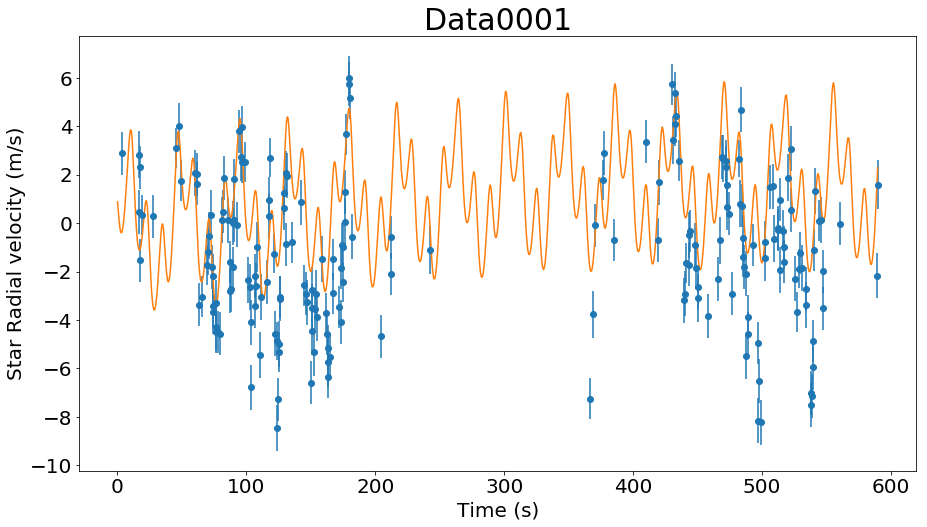

In [5]:
x = data[:,0]
xm = np.arange(0,data[-1,0],data[-1,0]/1000)
y = data[:,1]
y0 = model(mus3p001,xm,3)
yerr = data[:,2]
# First illustrate basic pyplot interface, using defaults where possible.
plt.figure(figsize=(15,8))
#plt.xlabel('teste')
plt.xlabel('Time (s)', fontsize=20)
plt.ylabel('Star Radial velocity (m/s)', fontsize=20)
plt.errorbar(x, y, yerr=yerr,fmt='o')
plt.plot(xm,y0)
plt.tick_params(labelsize=20)
plt.title("Data0001",fontsize=30)
#plt.plot(x,y,'o')

In [9]:
z=!sed -n '38p' chains/3pd0001a.resume
z3pd0001a=np.float(z[0])*np.log10(np.e)+np.log10(6)
print('Nominal value:',z3pd0001a)
print('Relative value:', np.power(10,z3pd0001a-z0pd0001a))

Nominal value: -173.766316714
Relative value: 6.00331026814e+37


In [ ]:
bfa=[]